In [1]:
import pandas as pd
import numpy as np

import plotnine
from plotnine import *

In [2]:
micro_colour_dict={
    '1a': '#FF8B82',
    '1b': '#FF8B82', 
    '2': '#009E92', 
    '3': '#F7B200', 
    '4': '#4CB9FF', 
    '5': '#FF81BE', 
    '1': '#FF8B82', 
    'x':'#878787',
    ' ':'#878787'
}

niche_label_pres=['1','2', '3']
niche_label_edad=['1','2','3', ' ']
niche_label_mdad=['1','2', '3',' ']
niche_label_odad=['1','2', '3',' ']

In [3]:
def generateRectBoxDF(all_candidates_ordered, start_candidates, stop_candidates, w1, w2, niche_labels, sep_niche=True, vertical=False, offset=False):
    if sep_niche:
        all_candidates_ordered=np.insert(all_candidates_ordered, [int(np.where(all_candidates_ordered == cell)[0] + 1) for cell in stop_candidates], ' ') 
    
    df_box=pd.DataFrame({
        'x2': np.array([np.where(all_candidates_ordered == c) for c in start_candidates]).flatten(),
        'x1': np.array([np.where(all_candidates_ordered == c) for c in stop_candidates]).flatten(),
        'y1': np.repeat(w1, len(start_candidates) ),
        'y2': np.repeat(w2, len(stop_candidates) ), 
        'niche': niche_labels
    })

    if sep_niche:
        df_box['x1']=df_box['x1'] + 1

    if offset:
        df_box['x1_offset']=range(len(df_box))[::-1]
        df_box['x2_offset']=range(1,len(df_box)+1)[::-1]
        df_box['x_text']=(df_box.x1 + df_box['x1_offset'])+( (df_box.x2+df_box['x2_offset']) - (df_box.x1+df_box['x1_offset']) )/2    
    else:
        df_box['x_text']=df_box.x1+(df_box.x2 - df_box.x1)/2
        
    df_box['y_text']=df_box.y1+(df_box.y2 - df_box.y1)/2
    
    if vertical:
        if offset:
            df_box=df_box.set_axis(['y2' 'y1' 'x1', 'x2', 'niche', 'y1_adj', 'y2_adj', 'y_text', 'x_text'], axis=1, inplace=False)
        else:
            df_box=df_box.set_axis(['y2' 'y1' 'x1', 'x2', 'niche', 'y_text', 'x_text'], axis=1, inplace=False)
    
    return df_box, all_candidates_ordered

def nmfDotPlot(df_dots, df_niches, colour_handles, x_dendro, y_dendro):
    g =(
        ggplot() +
        geom_point(data=df_dots, mapping=aes( x='Cellstate', y='factor', fill='norm_abundance', size='value' ), colour='white') +
        geom_rect(data=df_niches, mapping=aes(xmin='x1', xmax='x2', ymin='y1', ymax='y2'), fill=colour_handles ) +
        geom_text(data=df_niches, mapping=aes(x='x_text', y='y_text', label='niche'), colour='white', size=20) +
        theme_bw() +
        theme(axis_text_x=element_text(angle=90, vjust=1, hjust=1, size=28),
              axis_text_y=element_text(angle=90, vjust=1, hjust=1, size=20),
              axis_title=element_text(size=36), 
              axis_ticks_major_x=element_blank(),
              panel_grid_major=element_blank(),
              panel_border=element_blank(),
              panel_spacing_x=.5,
              panel_spacing_y=.2,
              legend_position='right' , 
              legend_key_height=40, 
              legend_title=element_text(size=20),
              legend_text=element_text(size=20),
              figure_size=(30,5), 
              dpi=300
             ) +
        scale_size_continuous(range=[0,15]) + 
        scale_fill_distiller(palette='RdPu', direction=1, limits=[-1,1], name='Z-score\nCell abundance\n\n') +
        scale_x_discrete(limits=x_dendro ) +
        scale_y_discrete(limits=['']*np.min(df_niches.y2.unique())+y_dendro)
    
    )
    return g


In [4]:
df_dotplot=pd.read_csv('../data/Fig5C_abundances.csv', index_col=0)

In [5]:
nmf_pres=pd.read_csv('../data/Fig5C_nmf_PRES.csv', sep=',', index_col=0)
nmf_pres.factor=nmf_pres.factor.astype('str')

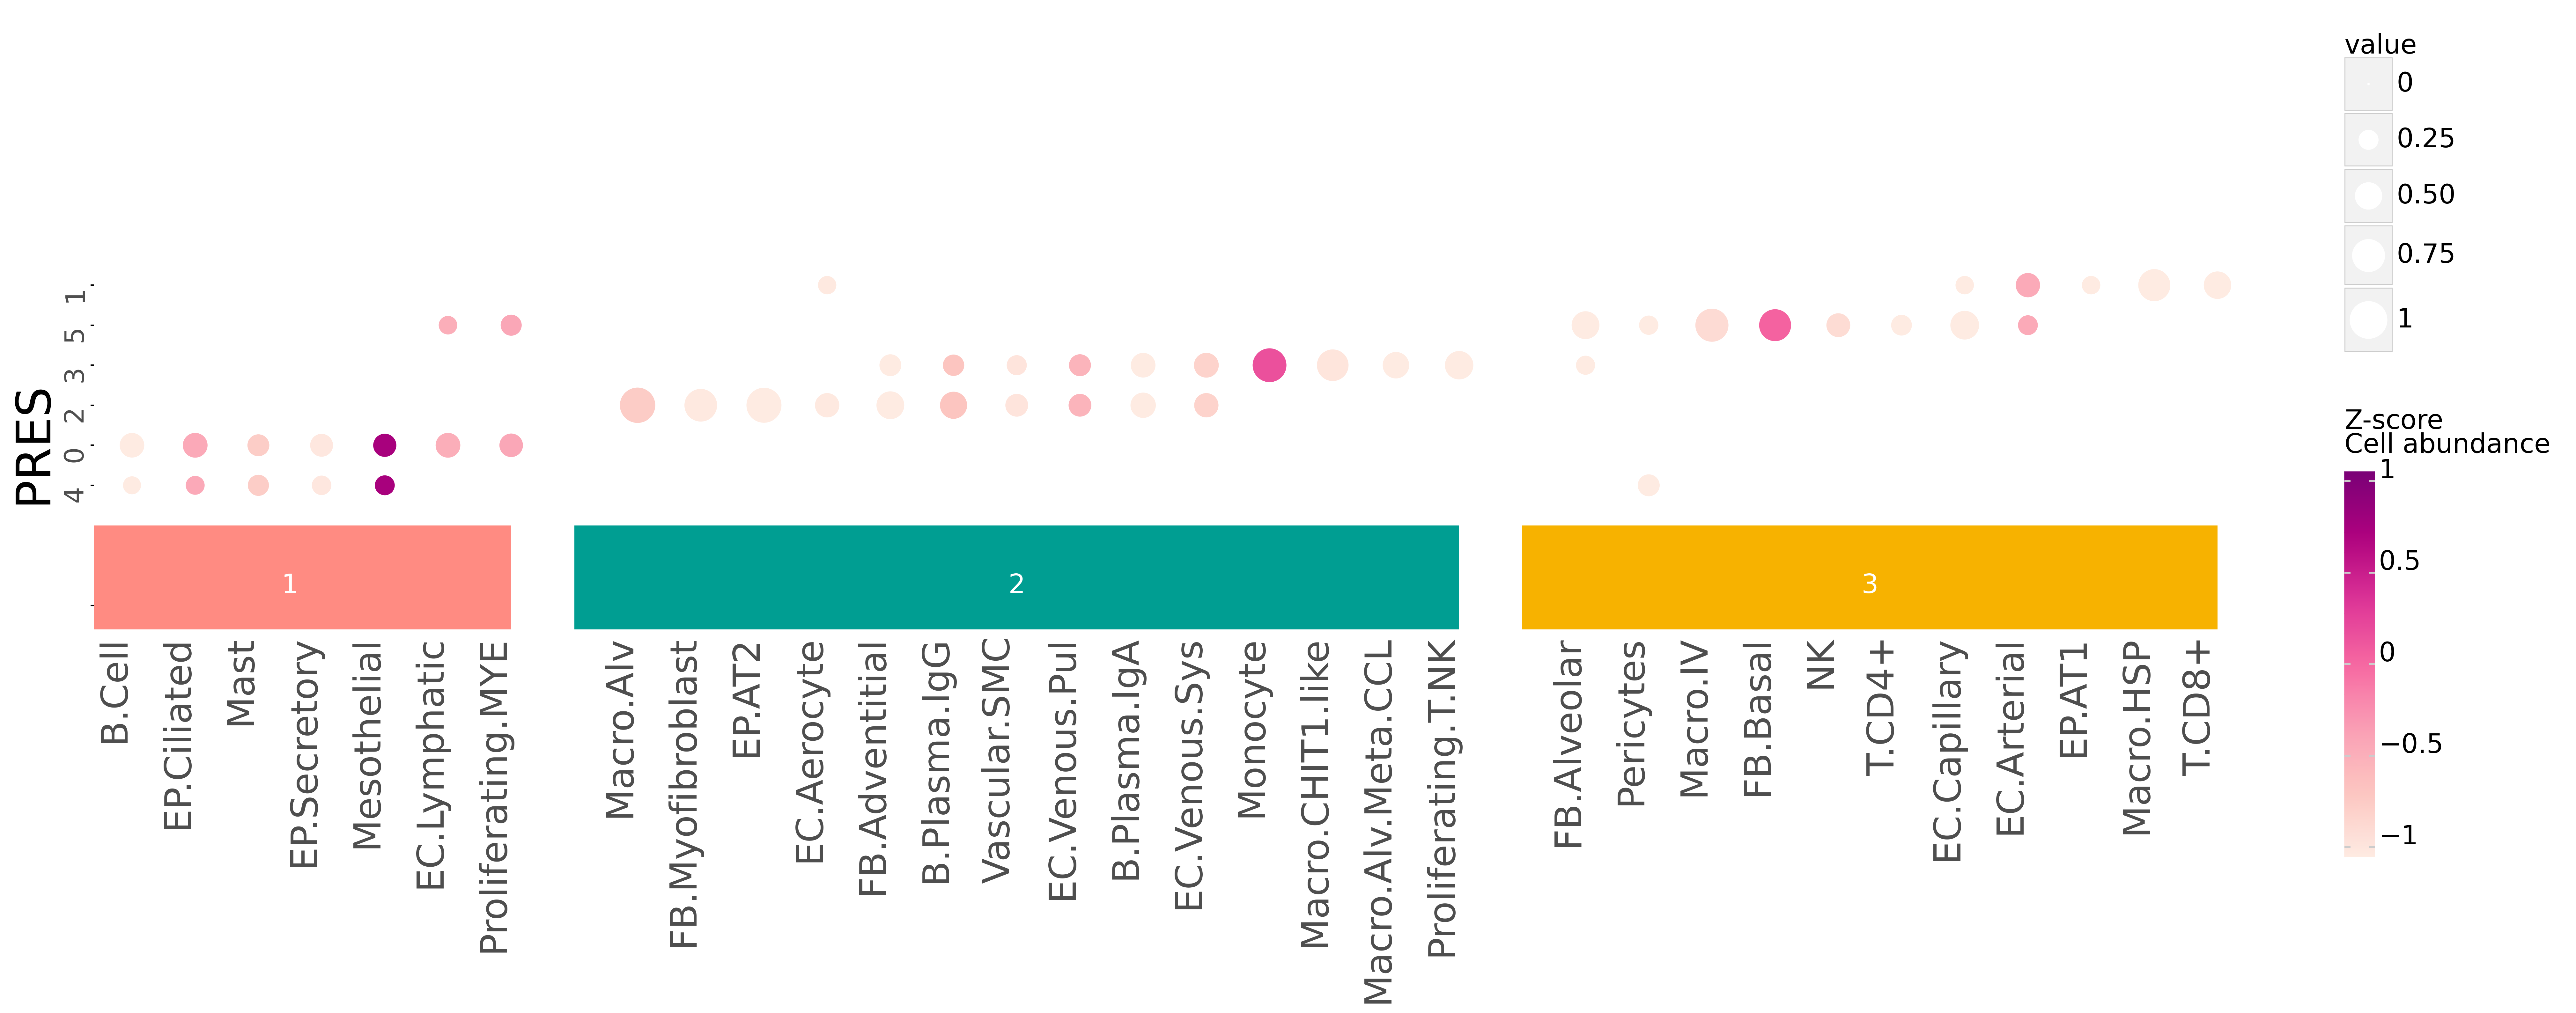

<ggplot: (8789582842093)>

In [6]:
start_candidates=['B.Cell', 'Macro.Alv', 'FB.Alveolar']
stop_candidates=['Proliferating.MYE', 'Proliferating.T.NK', 'T.CD8+']

pres_box, new_order_1=generateRectBoxDF(
    np.array([x for _,x in sorted(zip(nmf_pres.cell_state_manual_sort.unique(),nmf_pres.Cellstate.unique()))]),
    start_candidates=start_candidates,
    stop_candidates=stop_candidates,
    w1=0,
    w2=3,
    niche_labels=niche_label_pres,
    sep_niche=True
)

p1=nmfDotPlot(
    df_dots=nmf_pres,
    df_niches=pres_box,
    colour_handles=[micro_colour_dict.get(micro) for micro in pres_box.niche],
    x_dendro=new_order_1,
    y_dendro=[ '1', '5', '3', '2','0','4'][::-1]
) + ylab('PRES') + xlab('')


# ggsave(p1, 'Fig5C_PRES.pdf', format='pdf', limitsize=False)

p1 

In [7]:
nmf_edad=pd.read_csv('../data/Fig5C_nmf_EDAD.csv', sep=',', index_col=0)
nmf_edad.factor=nmf_edad.factor.astype('str')

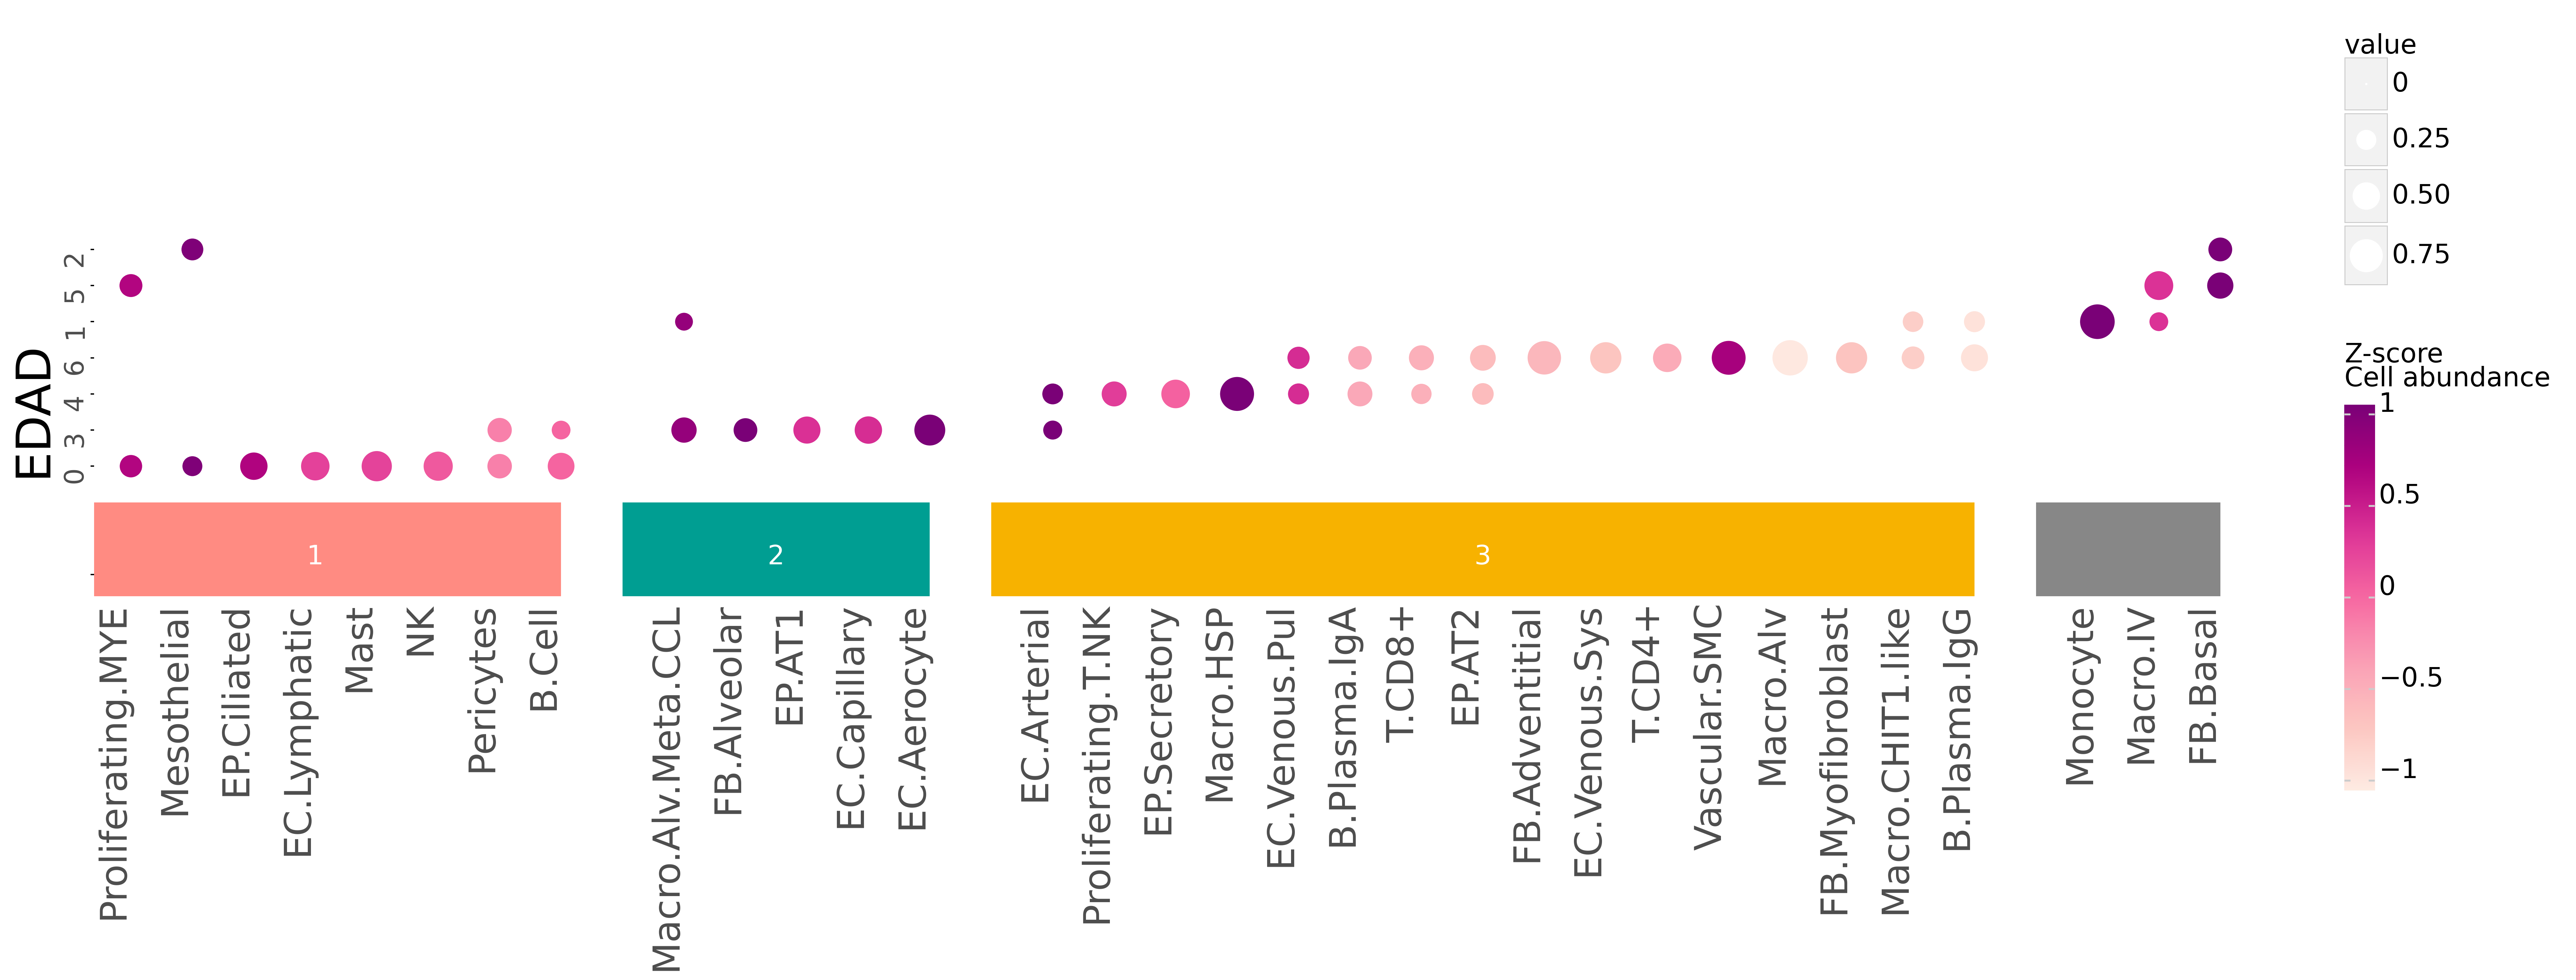

<ggplot: (8789572751609)>

In [8]:
start_candidates=['Proliferating.MYE', 'Macro.Alv.Meta.CCL', 'EC.Arterial', 'Monocyte']
stop_candidates=['B.Cell', 'EC.Aerocyte', 'B.Plasma.IgG', 'FB.Basal']

edad_box, new_order_2=generateRectBoxDF(
    np.array([x for _,x in sorted(zip(nmf_edad.cell_state_manual_sort.unique(),nmf_edad.Cellstate.unique()))]), 
    start_candidates=start_candidates,
    stop_candidates=stop_candidates,
    w1=0,
    w2=3,
    niche_labels=niche_label_edad,
    sep_niche=True
)

p2=nmfDotPlot(
    df_dots=nmf_edad,
    df_niches=edad_box,
    colour_handles=[micro_colour_dict.get(micro) for micro in edad_box.niche],
    x_dendro=new_order_2,
    y_dendro=['2','5', '1', '6', '4','3','0'][::-1]
) + ylab('EDAD') + xlab('')

# ggsave(p2, 'Fig5C_EDAD.pdf', format='pdf', limitsize=False)

p2

In [9]:
nmf_mdad=pd.read_csv('../data/Fig5C_nmf_MDAD.csv', sep=',', index_col=0)
nmf_mdad.factor=nmf_mdad.factor.astype('str')

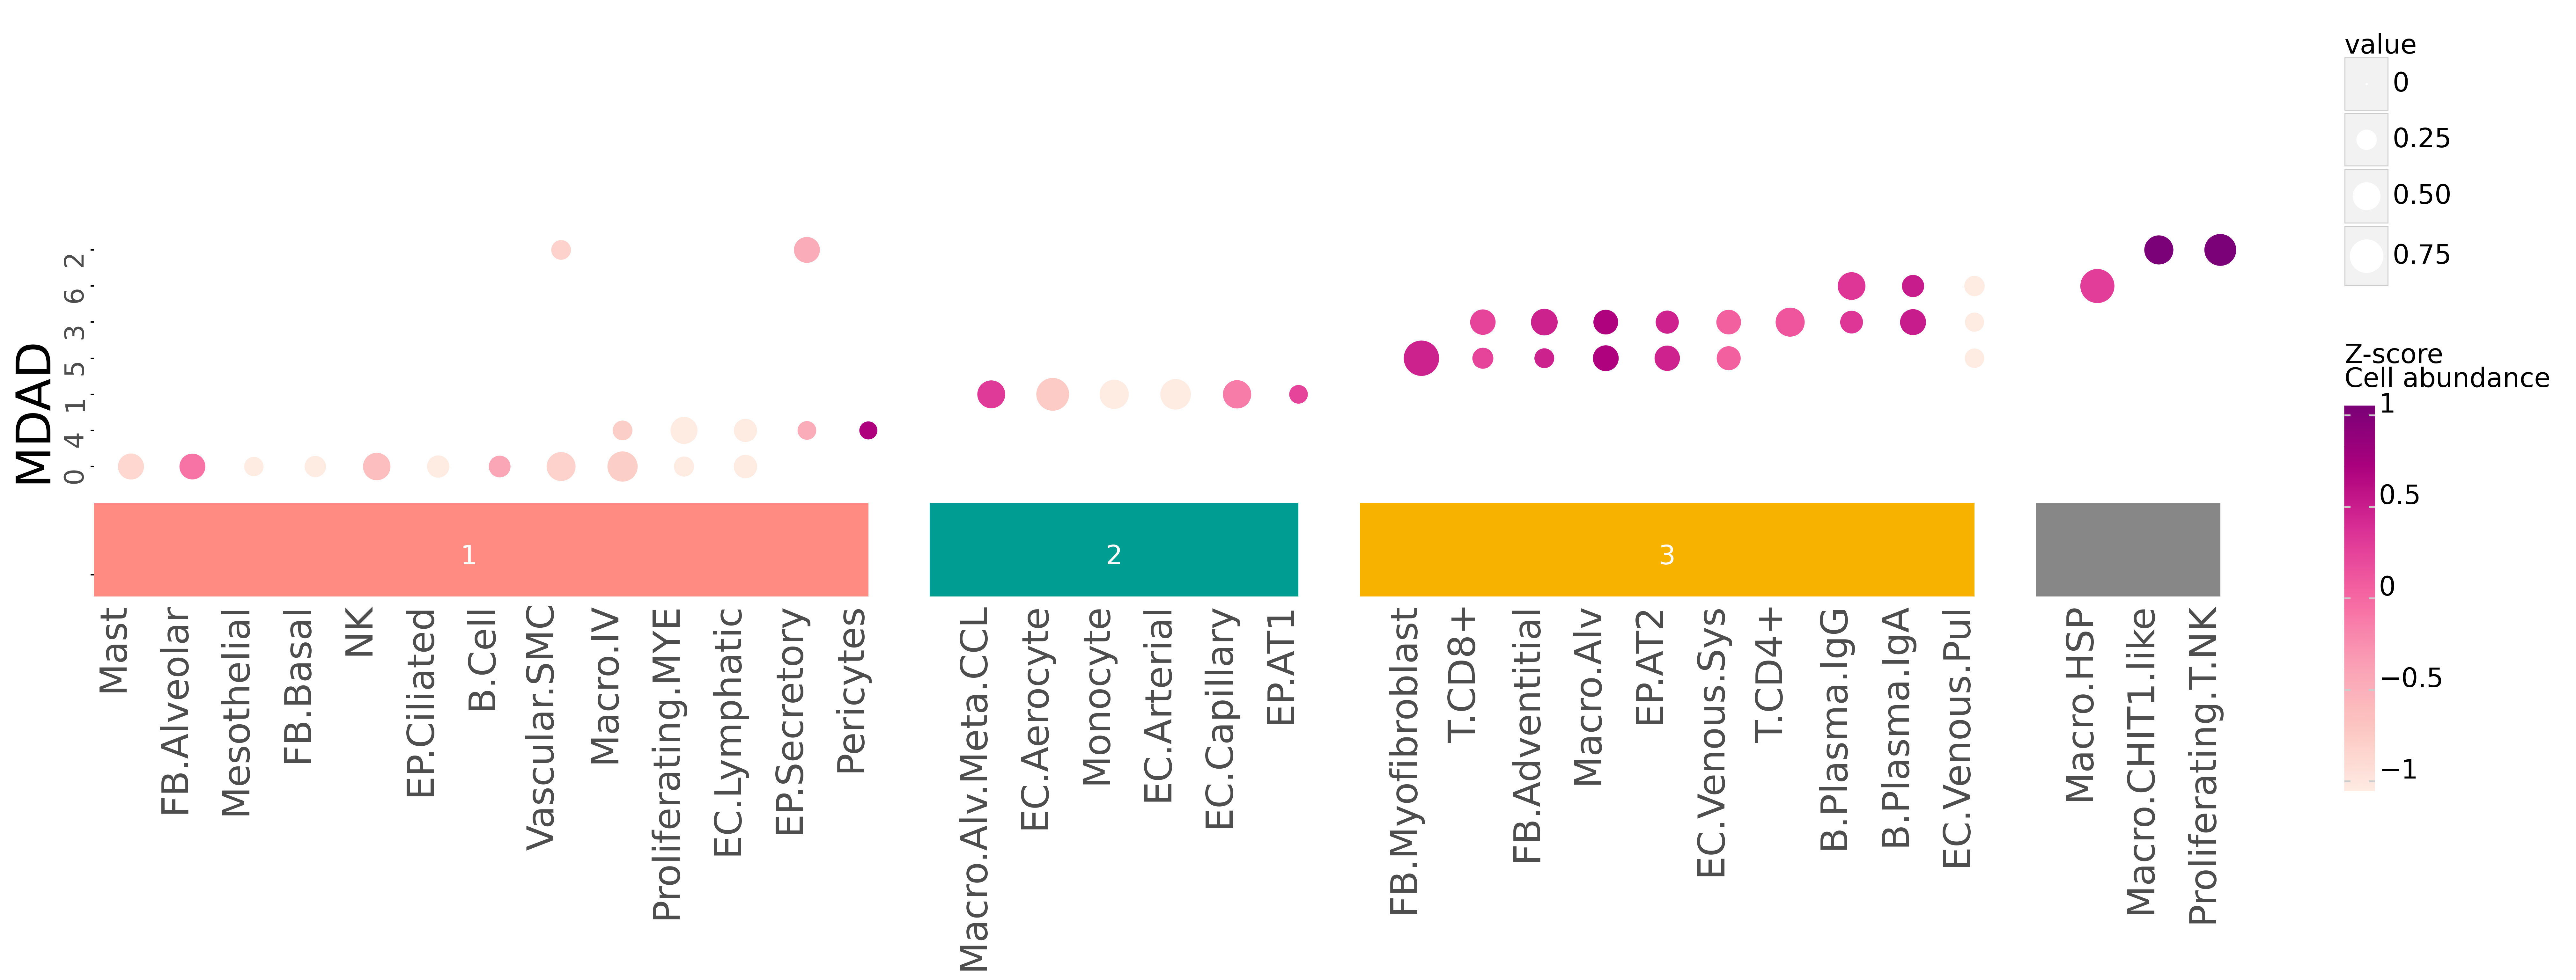

<ggplot: (8789572645201)>

In [10]:
start_candidates=['Mast', 'Macro.Alv.Meta.CCL', 'FB.Myofibroblast', 'Macro.HSP']
stop_candidates=['Pericytes', 'EP.AT1', 'EC.Venous.Pul', 'Proliferating.T.NK']

mdad_box, new_order_3=generateRectBoxDF(
    np.array([x for _,x in sorted(zip(nmf_mdad.cell_state_manual_sort.unique(),nmf_mdad.Cellstate.unique()))]), 
    start_candidates=start_candidates,
    stop_candidates=stop_candidates,
    w1=0,
    w2=3,
    niche_labels=niche_label_mdad,
    sep_niche=True
)

p3=nmfDotPlot(
    df_dots=nmf_mdad,
    df_niches=mdad_box,
    colour_handles=[micro_colour_dict.get(micro) for micro in mdad_box.niche],
    x_dendro=new_order_3,
    y_dendro=['2','6','3','5','1', '4','0'][::-1]
) + ylab('MDAD') + xlab('')

# ggsave(p3, 'Fig5C_MDAD.pdf', format='pdf', limitsize=False)

p3

In [11]:
nmf_odad=pd.read_csv('../data/Fig5C_nmf_ODAD.csv', sep=',', index_col=0)
nmf_odad.factor=nmf_odad.factor.astype('str')

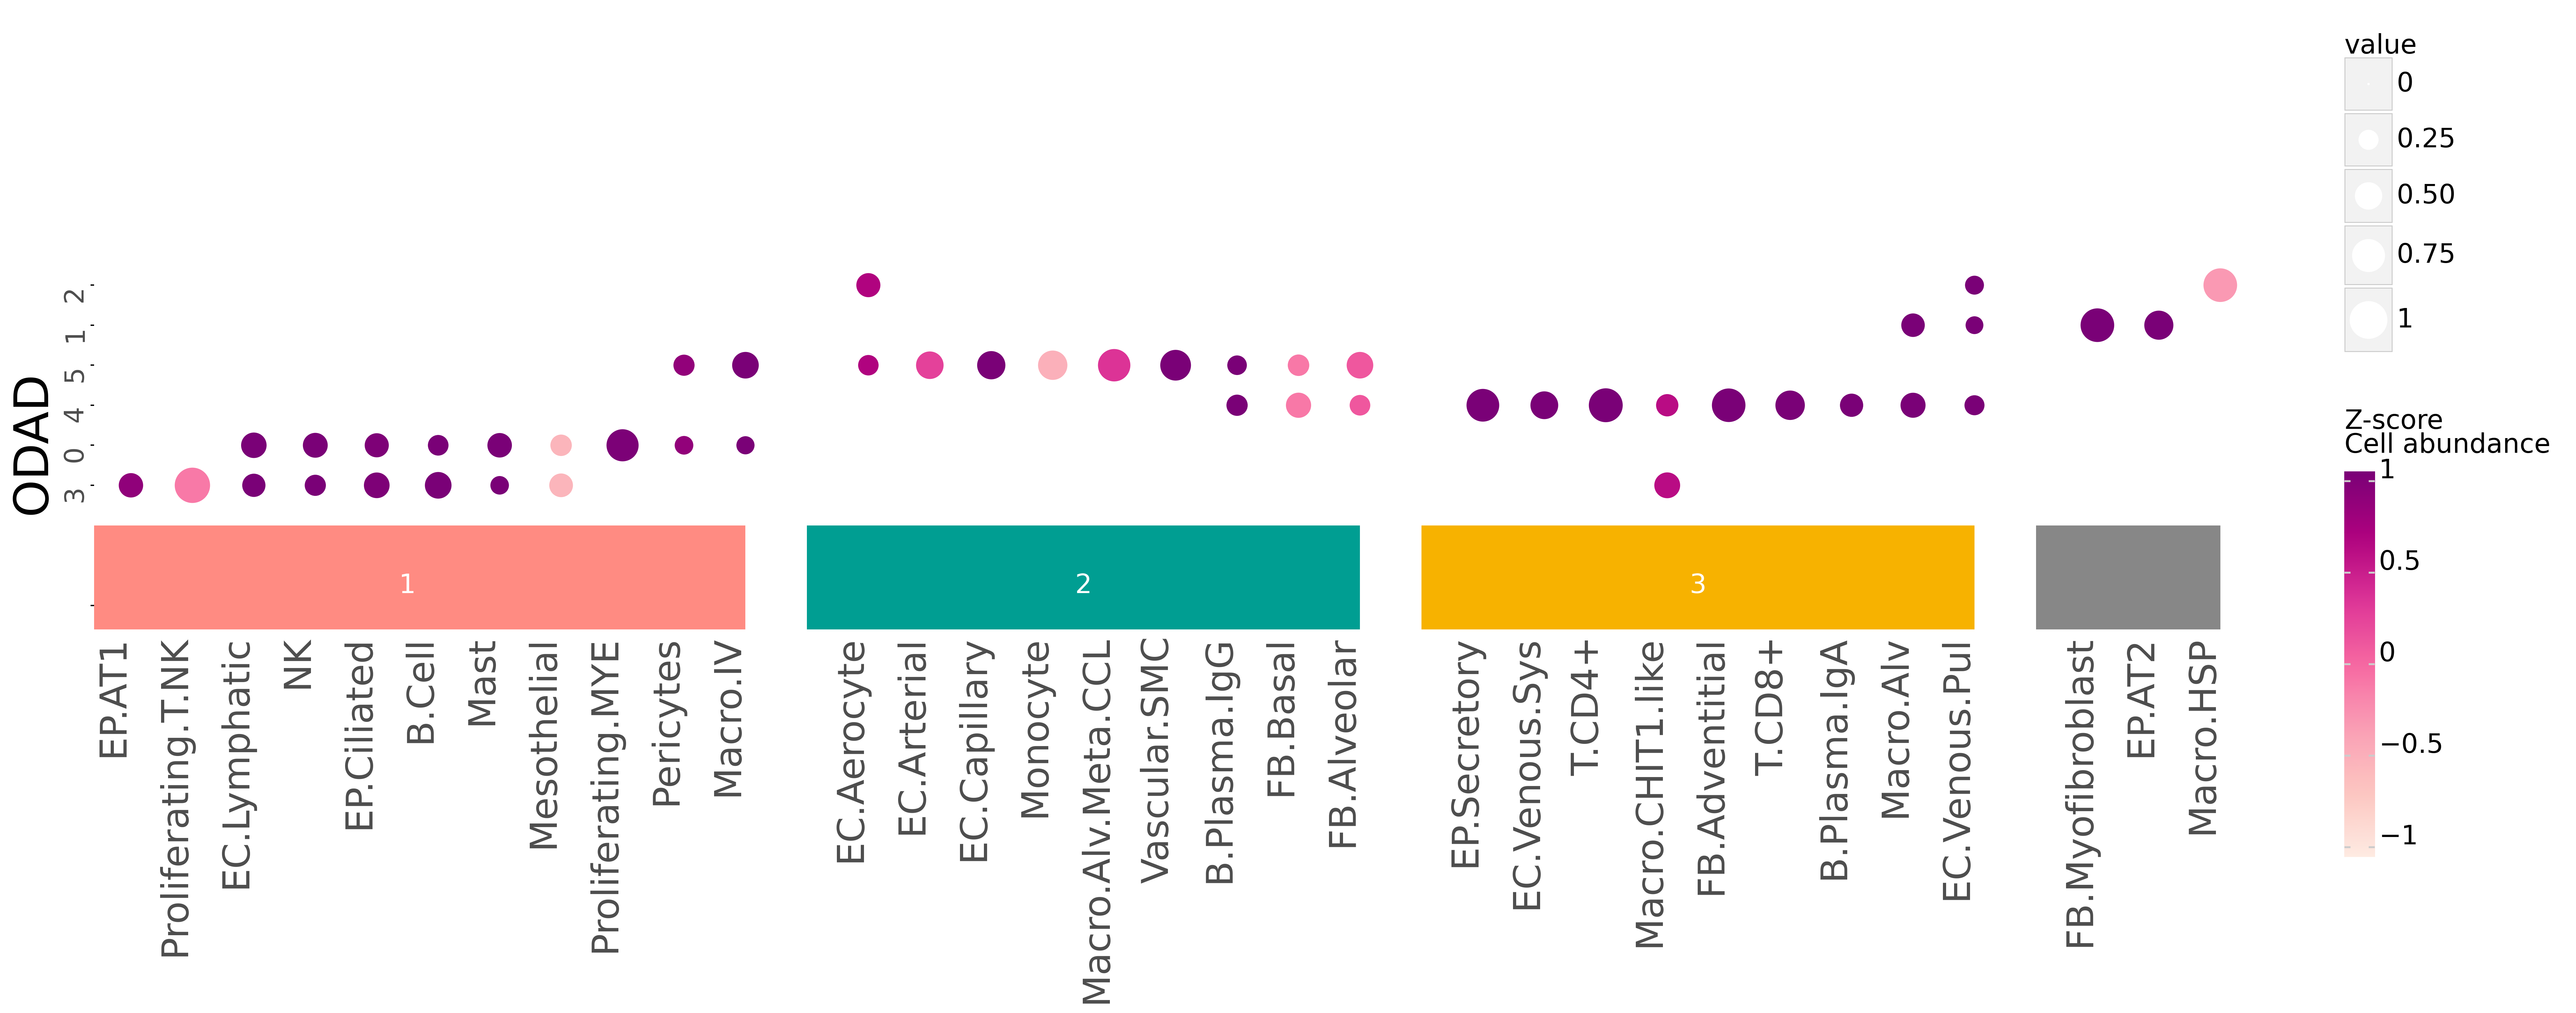

<ggplot: (8789571001761)>

In [12]:
start_candidates=['EP.AT1', 'EC.Aerocyte', 'EP.Secretory', 'FB.Myofibroblast']
stop_candidates=['Macro.IV', 'FB.Alveolar', 'EC.Venous.Pul', 'Macro.HSP']

odad_box, new_order_4=generateRectBoxDF(
    np.array([x for _,x in sorted(zip(nmf_odad.cell_state_manual_sort.unique(),nmf_odad.Cellstate.unique()))]), 
    start_candidates=start_candidates,
    stop_candidates=stop_candidates,
    w1=0,
    w2=3,
    niche_labels=niche_label_odad,
    sep_niche=True
)

p4=nmfDotPlot(
    df_dots=nmf_odad,
    df_niches=odad_box,
    colour_handles=[micro_colour_dict.get(micro) for micro in odad_box.niche],
    x_dendro=new_order_4,
    y_dendro=['2', '1', '5', '4', '0', '3'][::-1]
) + ylab('ODAD') + xlab('')

# ggsave(p4, 'Fig5C_ODAD.pdf', format='pdf', limitsize=False)

p4